In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import nipiezojenapy
import qt3utils.nidaq
import qt3utils.datagenerators as datasources
import qt3utils.datagenerators.piezoscanner
from argparse import Namespace
import matplotlib.pyplot as plt

In [3]:
import qt3utils.nidaq.config

In [4]:
qt3utils.nidaq.config.reset_daq('Dev1')

In [5]:
logging.basicConfig(level = logging.INFO)
#logging.getLogger(qt3utils.datagenerators.piezoscanner.__name__).setLevel(logging.INFO)

In [6]:
args = Namespace(daq_name='Dev1', 
                 signal_terminal='PFI0', 
                 scope_width=250, 
                 clock_rate=100000, 
                 num_data_samples_per_batch=50, 
                 clock_terminal=None, 
                 rwtimeout=10, 
                 signal_counter='ctr2', 
                 piezo_write_channels='ao0,ao1,ao2', 
                 piezo_read_channels='ai0,ai1,ai2', 
                 randomtest=False, 
                 cmap='Reds')

In [7]:
controller = nipiezojenapy.PiezoControl(device_name = args.daq_name,
                                  write_channels = args.piezo_write_channels.split(','),
                                  read_channels = args.piezo_read_channels.split(','))

In [8]:
data_acq = datasources.NiDaqSampler(args.daq_name,
                             args.signal_terminal,
                             args.clock_rate,
                             args.num_data_samples_per_batch,
                             args.clock_terminal,
                             args.rwtimeout,
                             args.signal_counter)

In [9]:
scanner = datasources.NiDaqPiezoScanner(data_acq, controller)

In [10]:
scanner.set_scan_range(0.01,40.01,0.01,40.01)

In [11]:
scanner.reset()

In [12]:
scanner.start()

INFO:nipiezojenapy.controller:go to position x: 0.01 y: 0.01


In [13]:
scanner.controller.get_current_position()

[-0.024685655065077045, -0.04658346316127078, -0.05302399495366178]

In [11]:
while scanner.still_scanning():
            scanner.scan_x()
            scanner.move_y()

INFO:qt3utils.datagenerators.piezoscanner:go to position 0.01
INFO:nipiezojenapy.controller:go to position x: 0.01
INFO:qt3utils.datagenerators.nidaqsampler:starting counter task
INFO:qt3utils.datagenerators.nidaqsampler:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.nidaqsampler:reading data
INFO:qt3utils.datagenerators.nidaqsampler:returned 50 samples
INFO:qt3utils.datagenerators.nidaqsampler:total counts 481.0
INFO:qt3utils.datagenerators.piezoscanner:count rate: 962000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [-0.0259737614237718, 0.03070291837234756, 9.649002042401447]
INFO:qt3utils.datagenerators.piezoscanner:go to position 0.51
INFO:nipiezojenapy.controller:go to position x: 0.51
INFO:qt3utils.datagenerators.nidaqsampler:starting counter task
INFO:qt3utils.datagenerators.nidaqsampler:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.nidaqsampler:reading data
INFO:qt3utils.datagenerators.nidaqsampler:returned 50 samples
INFO:qt3utils.datage

INFO:qt3utils.datagenerators.nidaqsampler:reading data
INFO:qt3utils.datagenerators.nidaqsampler:returned 50 samples
INFO:qt3utils.datagenerators.nidaqsampler:total counts 774.0
INFO:qt3utils.datagenerators.piezoscanner:count rate: 1548000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [6.538219087904739, -0.02339754870636967, 9.620663625177457]
INFO:qt3utils.datagenerators.piezoscanner:go to position 7.01
INFO:nipiezojenapy.controller:go to position x: 7.01
INFO:qt3utils.datagenerators.nidaqsampler:starting counter task
INFO:qt3utils.datagenerators.nidaqsampler:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.nidaqsampler:reading data
INFO:qt3utils.datagenerators.nidaqsampler:returned 50 samples
INFO:qt3utils.datagenerators.nidaqsampler:total counts 753.0
INFO:qt3utils.datagenerators.piezoscanner:count rate: 1506000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [6.981328278820306, -0.028549974141123938, 9.667035580868218]
INFO:qt3utils.datagener

KeyboardInterrupt: 

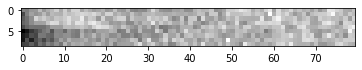

In [26]:
plt.imshow(scanner.data, cmap='gray')

In [14]:
scanner.stop()

In [28]:
scanner.data

[[1506000.0,
  1488000.0,
  1560000.0,
  1568000.0,
  1672000.0,
  1568000.0,
  1626000.0,
  1664000.0,
  1728000.0,
  1620000.0,
  1728000.0,
  1624000.0,
  1746000.0,
  1746000.0,
  1612000.0,
  1678000.0,
  1632000.0,
  1584000.0,
  1612000.0,
  1646000.0,
  1568000.0,
  1584000.0,
  1686000.0,
  1578000.0,
  1564000.0,
  1644000.0,
  1520000.0,
  1508000.0,
  1534000.0,
  1524000.0,
  1616000.0,
  1754000.0,
  1656000.0,
  1558000.0,
  1542000.0,
  1538000.0,
  1596000.0,
  1590000.0,
  1614000.0,
  1540000.0,
  1542000.0,
  1652000.0,
  1684000.0,
  1650000.0,
  1660000.0,
  1708000.0,
  1546000.0,
  1566000.0,
  1610000.0,
  1720000.0,
  1724000.0,
  1748000.0,
  1800000.0,
  1770000.0,
  1740000.0,
  1634000.0,
  1690000.0,
  1642000.0,
  1746000.0,
  1802000.0,
  1600000.0,
  1766000.0,
  1664000.0,
  1690000.0,
  1750000.0,
  1650000.0,
  1692000.0,
  1638000.0,
  1660000.0,
  1600000.0,
  1672000.0,
  1570000.0,
  1630000.0,
  1802000.0,
  1794000.0,
  1742000.0,
  1714000.0,

In [29]:
1./100000

1e-05

In [31]:
864/50 / (1./100000)

1728000.0